<h1>Citibike Network Assignment</h1>
<li>The file, 201809-citibike-tripdata.csv, contains citibike trip data from September 2018 (a reasonable sized file!)
<li>The data:<br>
"tripduration","starttime","stoptime","start station id","start station name","start station latitude","start station longitude","end station id","end station name","end station latitude","end station longitude","bikeid","usertype","birth year","gender"
<li>Each record in the data is a trip 
<li>The data is described at https://www.citibikenyc.com/system-data

<h1>STEP 1: Read the data into a dataframe</h1>
<li>Convert station ids to str if necessary

In [38]:
import pandas as pd
import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
file = "201801-citibike-tripdata.csv"
df = pd.read_csv(file)
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718989,843,2018-01-31 17:28:27.5390,2018-01-31 17:42:30.5890,3664,North Moore St & Greenwich St,40.720195,-74.010301,410,Suffolk St & Stanton St,40.720664,-73.985180,15153,Subscriber,1981,1
718990,244,2018-01-31 17:34:20.4510,2018-01-31 17:38:24.7200,3664,North Moore St & Greenwich St,40.720195,-74.010301,327,Vesey Pl & River Terrace,40.715338,-74.016584,26896,Subscriber,1960,1
718991,302,2018-01-31 18:20:55.5430,2018-01-31 18:25:58.3350,3664,North Moore St & Greenwich St,40.720195,-74.010301,327,Vesey Pl & River Terrace,40.715338,-74.016584,33111,Subscriber,1965,1
718992,222,2018-01-31 18:47:42.5720,2018-01-31 18:51:24.6830,3664,North Moore St & Greenwich St,40.720195,-74.010301,257,Lispenard St & Broadway,40.719392,-74.002472,16675,Subscriber,1969,0


<h1>STEP 2: Basic cleaning</h1>
<li>Remove data that have any nans in any row (none in this file but others do have nans)
<li>And convert stationids to str 

In [40]:
df.dropna(axis=0,how='any',inplace=True)
df['start station id'] = df['start station id'].astype(str)
df['end station id'] = df['end station id'].astype(str)


<h1>STEP 3: Write a function that returns a graph given a citibike data frame</h1> 
<li>Your function should return two things:
<ol>
<li>a graph
<li>a dictionary with station ids as the key and station name as the value
</ol>
<li>The graph should contain 
<ol>
<li>nodes (station ids)
<li>edges (station id, station id)
<li>edge data 
<ol>
<li>count: number of trips on the edge
<li>time: average duration - pickup to dropoff - on that edge
</ol>
</ol>
<li><b>Note:</b> the edge (x1,y1) is the same as (y1,x1) even though the start station ids and end station ids are flipped in the dataframe

In [116]:
def get_citibike_network(df):
    import networkx as nx
    %matplotlib inline
    import matplotlib.pyplot as plt
    G=nx.Graph()
    nodes=list()
    node_names = dict()
    for i in df['start station id'].unique():
        node_names[i]=df[df['start station id']==i]['start station name'].iloc[0]
    for j in df['end station id'].unique():
        if j in node_names.keys():
            continue
        else:
            node_names[j]=df[df['end station id']==j]['end station name'].iloc[0]
    G.add_nodes_from(node_names.keys())
    df=df[df['start station id']!=df['end station id']]
    df['start id']=df.apply(lambda x: min(int(x['start station id']),int(x['end station id'])),axis=1)
    df['end id']=df.apply(lambda x: max(int(x['start station id']),int(x['end station id'])),axis=1)
    df['start id'] = df['start id'].apply(str)
    df['end id'] = df['end id'].apply(str)
    grouped = df.groupby(['start id','end id'])
    average=grouped['tripduration'].mean()
    ct=grouped['tripduration'].count()
    for i in average.index:
        G.add_edge(i[0],i[1],time=average[i])
    for j in ct.index:
        G.add_edge(j[0],j[1],count=ct[j])
    pos=nx.spring_layout(G)
    plt.figure(figsize=(20,20)) 
    nx.draw_networkx_nodes(G,pos,node_color='r',node_size=500,alpha=0.8)
    nx.draw_networkx_edges(G,pos,edgelist=G.edges(),width=5,alpha=0.5,edge_color='b')
    node_x={}
    for nn in G.nodes():
        node_x[nn]=str(nn)
    nx.draw_networkx_edge_labels(G,pos,font_size=12) 
    nx.draw_networkx_labels(G,pos,node_x,font_size=14)
    plt.axis('off')
    plt.show() 
    return G,node_names

<h1>STEP 4: Create the following graphs using the function above</h1>
<li>G: A graph of all the data in the dataframe
<li>m_G: A graph containing only data from male riders
<li>f_G: A graph containing only data from female riders
<li>Note: for m_G and f_G you will need to extract data from the dataframe and male has gender=1; female has gender=2

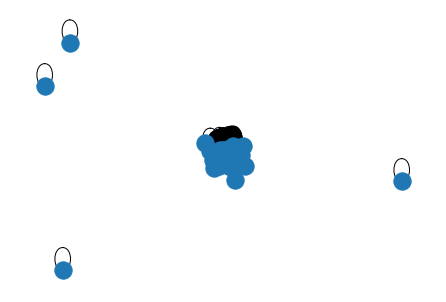

In [117]:
G,nodes=get_citibike_graph(df)
%matplotlib inline
nx.draw(G)

In [118]:
m_df = df[df.gender==1]
f_df = df[df.gender==2]

In [119]:
m_G = get_citibike_graph(m_df)[0]
f_G = get_citibike_graph(f_df)[0]

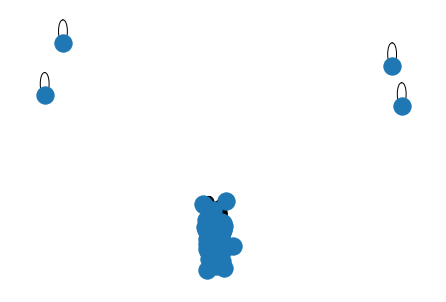

In [120]:
%matplotlib inline
nx.draw(m_G)


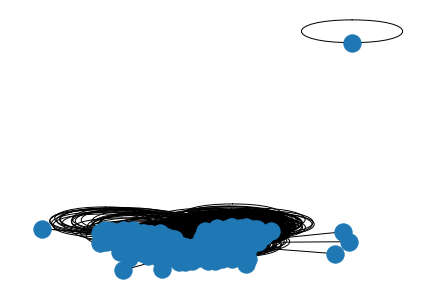

In [121]:
%matplotlib inline
nx.draw(f_G)


<h1>STEP 5: Answer the following questions for each of the graphs</h1>
<ol>
Please answer the following questions for total_df, male_df & female_df:
<li>Which stations (name) are the best and worst connected (max degree)?
<li>Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs. Report both the two stations as well as the time in minutes
<li>Which edges are associated with the most and least number of trips?

Which stations (name) have the greatest and least number of connections (max degree)?

In [107]:
degree_g = nx.degree(G)
list_degree_g =list(degree_g)
max_degree_g=max(list_degree_g,key=lambda x: x[1]) 
max_node_g = nodes.get(max_degree_g[0])

m_degree = nx.degree(m_G)
list_m_degree =list(m_deg)
max_degree_m=max(list_m_degree,key=lambda x: x[1]) 
max_node_m = nodes.get(max_degree_m[0])

f_degree = nx.degree(f_G)
list_f_degree=list(f_degree)
max_degree_f=max(list_f_degree,key=lambda x: x[1]) 
max_node_f = nodes.get(max_degree_f[0])     

print('Best connected: ', max_node_g)
print('Best connected male station: ', max_node_m)
print('Best connected female station: ', max_node_f)

Best connected:  Pershing Square North
Best connected male station:  Pershing Square North
Best connected female station:  Pershing Square North


In [108]:
degree_g = nx.degree(G)
list_degree_g =list(degree_g)
min_degree_g=min(list_degree_g,key=lambda x: x[1]) 
min_node_g = nodes.get(min_degree_g[0])

m_degree = nx.degree(m_G)
list_m_degree =list(m_deg)
min_degree_m=min(list_m_degree,key=lambda x: x[1]) 
min_node_m = nodes.get(min_degree_m[0])

f_degree = nx.degree(f_G)
list_f_degree=list(f_degree)
min_degree_f=min(list_f_degree,key=lambda x: x[1]) 
min_node_f = nodes.get(min_degree_f[0])     

print('Worst connected: ', min_node_g)
print('Worst connected male station: ', min_node_m)
print('Worst connected female station: ', min_node_f)

Worst connected:  NYCBS Depot - 3AV
Worst connected male station:  NYCBS Depot BAL - DYR
Worst connected female station:  NYCBS Depot - 3AV


Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs

In [109]:
g_edge=list(G.edges(data=True))
g_max_time=max(g_edge, key=lambda x: x[2]['time'])
g_n1,g_n2 = nodes.get(g_max_time[0]),nodes.get(g_max_time[1])
m_edge=list(m_G.edges(data=True))
m_max_time = max(m_edge, key=lambda x: x[2]['time'])
m_n1,m_n2 = nodes.get(m_max_time[0]),nodes.get(m_max_time[1])
f_edge=list(f_G.edges(data=True))
f_max_time=max(f_edge, key=lambda x: x[2]['time'])
f_n1,f_n2 = nodes.get(f_max_time[0]),nodes.get(f_max_time[1])
print("Average longest duration between stations: ",g_n1, " to ",g_n2," is: ",int(g_max_time[2]['time']))
print("Average longest duration between male stations: ",m_n1, " to ",m_n2," is: ",int(m_max_time[2]['time']))
print("Average longest duration between female stations: ",f_n1, " to ",f_n2," is: ",int(f_max_time[2]['time']))

Average longest duration between stations:  Nassau St & Navy St  to  Hope St & Union Ave  is:  19510049
Average longest duration between male stations:  Nassau St & Navy St  to  Hope St & Union Ave  is:  19510049
Average longest duration between female stations:  Adelphi St & Myrtle Ave  to  NYCBS Depot - 3AV  is:  4421929


Which edges are associated with the most and least number of trips?

In [110]:
g_edges=list(G.edges(data=True))
g_max_count=max(g_edges, key=lambda x: x[2]['trips'])
g_c1, g_c2 = nodes.get(g_max_count[0]),nodes.get(g_max_count[1])
m_edges= list(m_G.edges(data=True))
m_max_count=max(m_edges, key=lambda x: x[2]['trips'])
m_c1, m_c2 = nodes.get(m_max_count[0]),nodes.get(m_max_count[1])
f_edges= list(f_G.edges(data=True))
f_max_count=max(f_edges, key=lambda x: x[2]['trips'])
f_c1, f_c2=nodes.get(f_max_count[0]),nodes.get(f_max_count[1])

print("Most trip routes for males are from: ",m_c1, " to ",m_c2, " = ", m_max_count[2]['trips'])
print("Most trip routes for females are from : ",f_c1, " to ",f_c2, " = ", f_max_count[2]['trips'])
print("Most trip routes are from: ",g_c1, " to ",g_c2, " = ", g_max_count[2]['trips'])

Most trip routes for males are from:  Cooper Square & Astor Pl  to  E 7 St & Avenue A  =  533
Most trip routes for females are from :  E 7 St & Avenue A  to  Cooper Square & Astor Pl  =  161
Most trip routes are from:  Cooper Square & Astor Pl  to  E 7 St & Avenue A  =  700


In [111]:
g_edges=list(G.edges(data=True))
g_min_count=min(g_edges, key=lambda x: x[2]['trips'])
g_c1, g_c2 = nodes.get(g_min_count[0]),nodes.get(g_min_count[1])
m_edges= list(m_G.edges(data=True))
m_min_count=min(m_edges, key=lambda x: x[2]['trips'])
m_c1, m_c2 = nodes.get(m_min_count[0]),nodes.get(m_min_count[1])
f_edges= list(f_G.edges(data=True))
f_min_count=min(f_edges, key=lambda x: x[2]['trips'])
f_c1, f_c2=nodes.get(f_min_count[0]),nodes.get(f_min_count[1])

print("Least trip routes for males are from: ",m_c1, " to ",m_c2, " = ", m_min_count[2]['trips'])
print("Least trip routes for females are from : ",f_c1, " to ",f_c2, " = ", f_min_count[2]['trips'])
print("Least trip routes are from: ",g_c1, " to ",g_c2, " = ", g_min_count[2]['trips'])

Least trip routes for males are from:  W 52 St & 11 Ave  to  Frederick Douglass Blvd & W 117 St  =  1
Least trip routes for females are from :  W 52 St & 11 Ave  to  1 Ave & E 68 St  =  1
Least trip routes are from:  W 52 St & 11 Ave  to  Frederick Douglass Blvd & W 117 St  =  1


<h2>Centrality</h2>
One of the concerns that the citibike system has to deal with is ensuring that no station has empty slots (a bike should always be available) and that no station should have no empty slots (you should be able to return a bike). To do this, it needs to monitor the movement of bikes through the system, ideally using a directed graph. Though our graph is not directed, we can look at some network characteristics that will help us answer these questions. Note that the "trips" feature in edge data captures flows.
<li>Which node is a possible bottleneck node in terms of bike flows?
<li>Which node is the "nearest" to all other nodes (irrespective of flows)?
<li>Which node is the "nearest" to all other nodes (in terms of distance = time)?


In [115]:
from networkx.algorithms import closeness_centrality
from networkx.algorithms import betweenness_centrality

bcg=betweenness_centrality(G)
ccg=closeness_centrality(G)
cctg=closeness_centrality(G,distance='time')
bcm=betweenness_centrality(m_G)
ccm=closeness_centrality(m_G)
cctm=closeness_centrality(m_G,distance='time')
bcf=betweenness_centrality(f_G)
ccf=closeness_centrality(f_G)
cctf = closeness_centrality(f_G,distance='time')
max_bcg=max(bcg.items(), key=lambda x:x[1])
max_ccg = max(ccg.items(), key=lambda x:x[1])
max_cctg = max(cctg.items(), key=lambda x:x[1])
max_bcm = max(bcm.items(), key=lambda x:x[1])
max_ccm = max(ccm.items(), key=lambda x:x[1])
max_cctm = max(cctm.items(), key=lambda x:x[1])
max_bcf= max(bcf.items(), key=lambda x:x[1])
max_ccf = max(ccf.items(), key=lambda x:x[1])
max_cctf = max(cctf.items(), key=lambda x:x[1])
print('Possible bottleneck node in terms of bike flows: ', nodes.get(max_bcg[0]))
print('Nearest to all other nodes (irrespective of flows): ', nodes.get(max_ccg[0]))
print('Nearest to all other nodes (in terms of distance = time): ', nodes.get(max_cctg[0]),"\n")
print('Possible bottleneck node in terms of bike flows for males: ', nodes.get(max_bcm[0]))
print('Nearest to all other nodes (irrespective of flows) for males: ', nodes.get(max_ccm[0]))
print('Nearest to all other nodes (in terms of distance = time) for males: ', nodes.get(max_cctm[0]),"\n")
print('Possible bottleneck node in terms of bike flows for females: ', nodes.get(max_bcf[0]))
print('Nearest to all other nodes (irrespective of flows) for females: ', nodes.get(max_ccf[0]))
print('Nearest to all other nodes (in terms of distance = time) for females: ', nodes.get(max_cctf[0]))

Possible bottleneck node in terms of bike flows:  1 Ave & E 62 St
Nearest to all other nodes (irrespective of flows):  Pershing Square North
Nearest to all other nodes (in terms of distance = time):  E 4 St & 2 Ave 

Possible bottleneck node in terms of bike flows for males:  Queens Plaza North & Crescent St
Nearest to all other nodes (irrespective of flows) for males:  Pershing Square North
Nearest to all other nodes (in terms of distance = time) for males:  E 2 St & 2 Ave 

Possible bottleneck node in terms of bike flows for females:  Queens Plaza North & Crescent St
Nearest to all other nodes (irrespective of flows) for females:  Pershing Square North
Nearest to all other nodes (in terms of distance = time) for females:  Stanton St & Chrystie St
